In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,MiniBatchKMeans
from tqdm import tqdm
import os

In [4]:
path = "../../../data/shengli/"
n1,n2,n3 = 511,621,601

In [3]:
well = np.load("../../../data/shengli/correctWell.npz")
list(well.keys())

['seis', 'mask', 'cdpx', 'iline', 'xline', 'cdpy', 'wellName', 'lith']

In [4]:
well['lith'][well['lith']==2] = 1
well['lith'][well['lith']==3] = 2

In [5]:
well['lith'],well['iline'],well['xline']

(array([3, 1, 1, 2, 2, 2, 4, 3, 2, 1, 1, 2]),
 array([149, 260, 190, 387, 224, 239, 280, 101,  51, 426, 149, 164]),
 array([442, 207, 486, 285, 339, 407, 268, 421, 481, 253, 521, 397]))

In [6]:
labels = np.zeros((n1,n2))
for ii,(i,j,k) in enumerate(zip(well['iline'],well['xline'],well['lith'])):
    if k == 3:
        labels[i][j] = 2
    elif k == 4:
        labels[i][j] = 3
    else:
        labels[i][j] = k

In [ ]:
# labels.astype(np.float32).tofile('label_ngs3.dat')

In [5]:
hor = np.fromfile(path+'ngs3.dat',dtype=np.float32).reshape(n1,n2)

hor2 = np.fromfile(path+'ngs4.dat',dtype=np.float32).reshape(n1,n2)

In [6]:

sx = np.fromfile(path+'sx.dat',dtype=np.float32).reshape(n1,n2,n3)
# sx = np.load(path+'cdgAmpConst.npy')


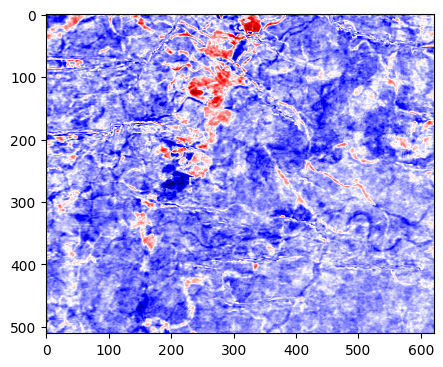

In [29]:
sx_hor = np.zeros((n1,n2,12))
for i in range(n1):
    for j in range(n2):
        sx_hor[i,j] = sx[i,j,round(hor[i,j])-9:round(hor[i,j])+3]
plt.figure(figsize=(5,5),dpi=100)
plt.imshow(sx_hor[:,:,0],cmap='seismic')

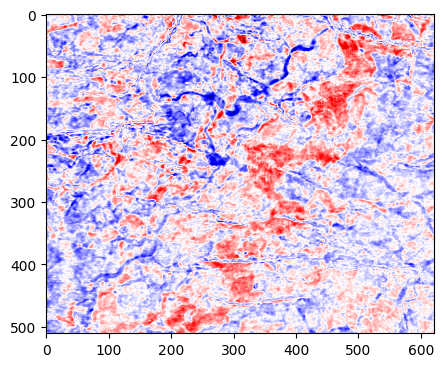

In [9]:
os.listdir(path+'/attr')

['cdgInsPhs.npy',
 'cdgGenSpectDecom.npy',
 'cdgDipDev.npy',
 'cdgVar.npy',
 'cdgQuadraAmp.npy',
 'cdgSwt.npy',
 'cdgRmsa.npy',
 'cdgEdge.npy',
 'cdgAmpConst.npy',
 'cdgIsoFreqComp.npy',
 'cdgInsQua.npy',
 'cdgPhaseShift.npy',
 'cdgStrucSmooth.npy',
 'cdgCurv.npy',
 'cdgInsBandW.npy',
 'cdgLoStDip.npy',
 'cdgInsFrq.npy',
 'cdgEnvelope.npy']

In [ ]:
dir = [i for i in os.listdir(path+'/attr/') if 'npy' in i]
# dir = ['cdgVar.npy','cdgInsPhs.npy','cdgSwt.npy','cdgRmsa.npy','cdgPhaseShift.npy','cdgEnvelope.npy']
name = ['方差','瞬时相位','甜点','均方根','相位差','包络']
for i in dir:
    attr = np.load(path+'/attr/'+i)
    attr.astype(np.float32).tofile(path+i.split('.')[0]+'.dat')

KeyboardInterrupt: 

100%|██████████| 19/19 [00:58<00:00,  3.07s/it]


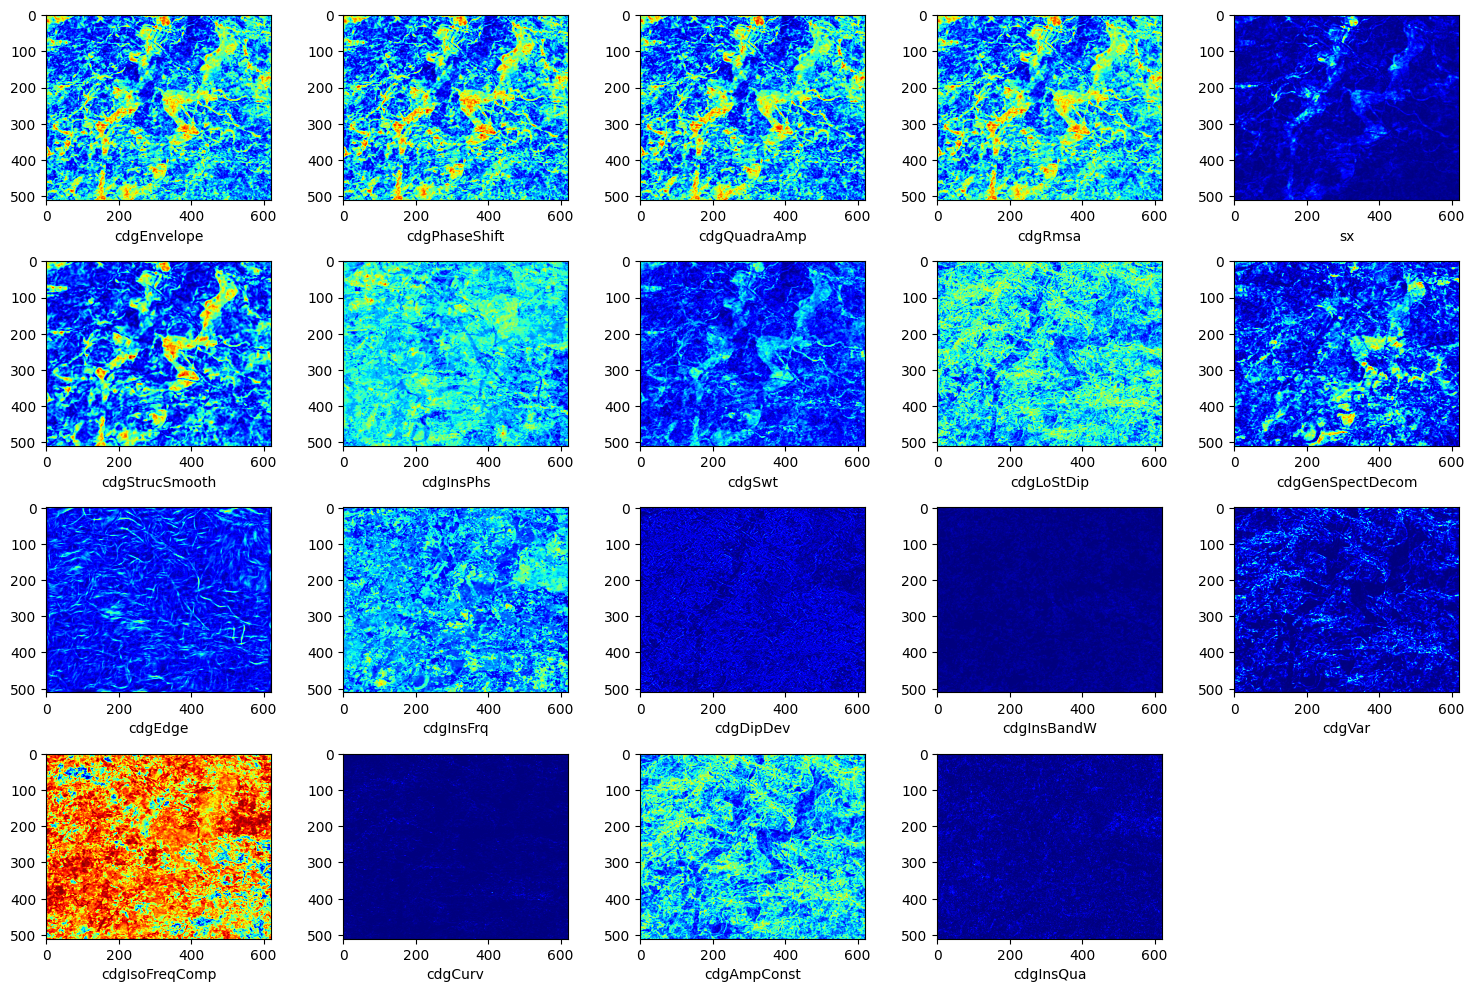

In [12]:
propertys=['sx','cdgInsPhs','cdgGenSpectDecom','cdgDipDev','cdgVar','cdgQuadraAmp','cdgSwt',
        'cdgRmsa','cdgEdge','cdgAmpConst','cdgIsoFreqComp','cdgInsQua','cdgPhaseShift',
        'cdgStrucSmooth','cdgCurv','cdgInsBandW','cdgLoStDip','cdgInsFrq','cdgEnvelope']
propertys=['cdgEnvelope','cdgPhaseShift','cdgQuadraAmp','cdgRmsa','sx','cdgStrucSmooth',
'cdgInsPhs', 'cdgSwt', 'cdgLoStDip','cdgGenSpectDecom','cdgEdge', 'cdgInsFrq','cdgDipDev', 
'cdgInsBandW', 'cdgVar','cdgIsoFreqComp', 'cdgCurv','cdgAmpConst','cdgInsQua']
n = 1
plt.figure(figsize=(15,10))
hors = np.zeros((n1,n2))
for p in tqdm(propertys):
    attr = np.fromfile(path+p+'.dat',dtype=np.float32).reshape(n1,n2,n3)
    for i in range(n1):
        for j in range(n2):
            d = int(hor[i,j])
            hors[i,j] = np.square(attr[i,j,d-7-7:d-7+8]).sum()
    plt.subplot(4,5,n)
    plt.imshow(hors,cmap='jet')
    plt.xlabel(p)
    n = n+1 
plt.tight_layout()   

100%|██████████| 50/50 [01:16<00:00,  1.53s/it]


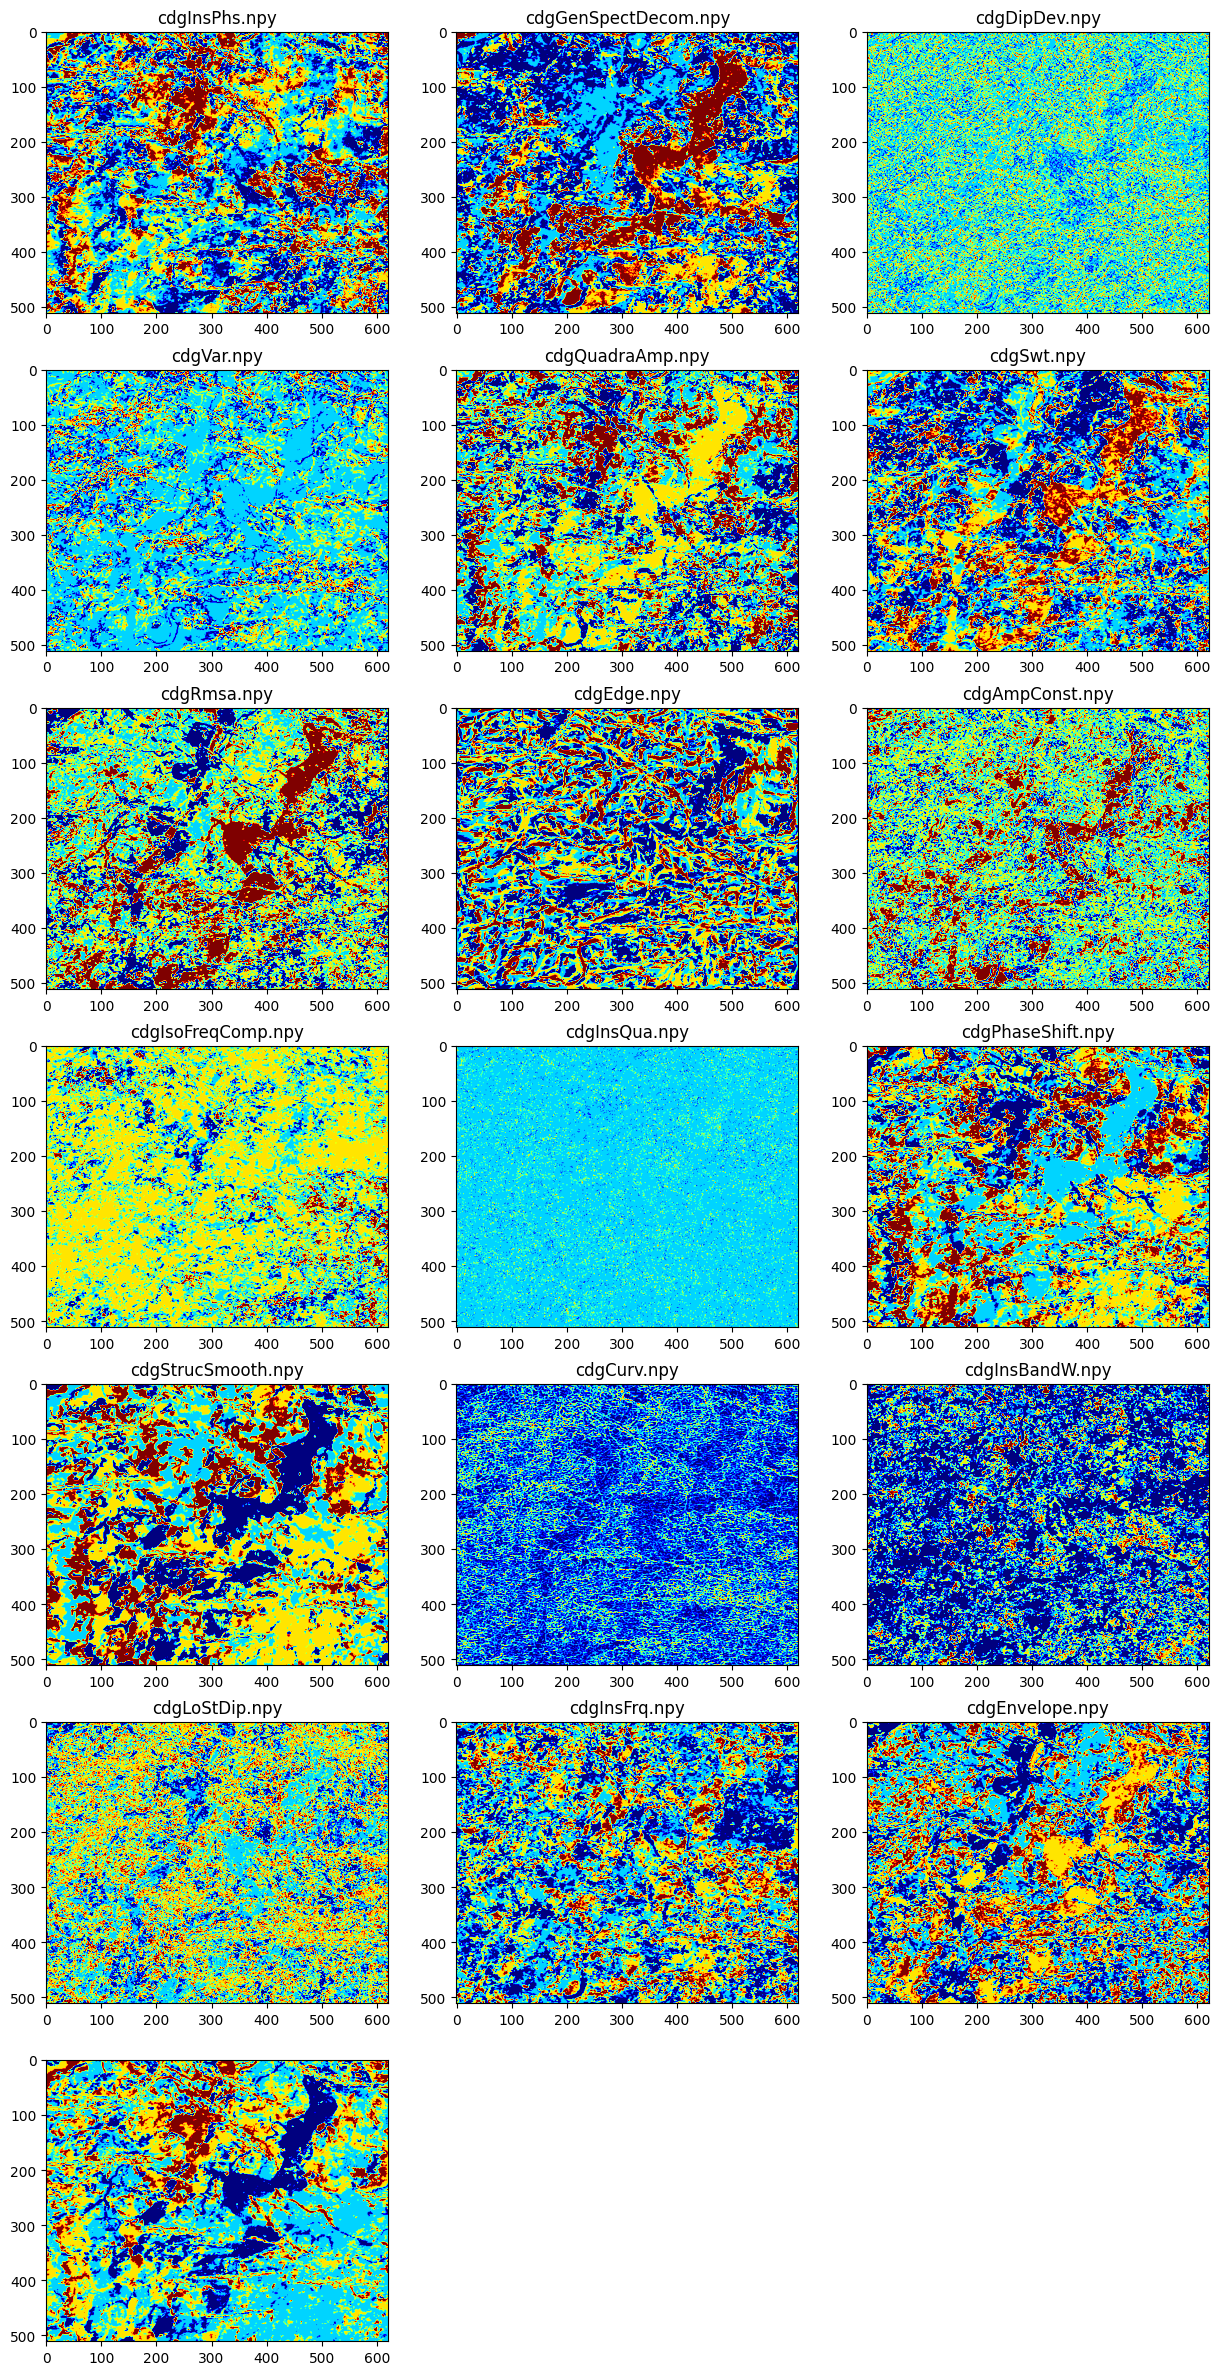

In [ ]:
up = 15
down = 0
hors = np.zeros((n1,n2,up+down+1))
dir = os.listdir(path)
attrs = []
n = 1
plt.figure(figsize=(15,30))
for p in tqdm(dir):
    if 'npy' in p:
        attr = np.load(path+p)
        print(attr.shape)
        for i in range(n1):
            for j in range(n2):
                d = int(hor[i,j])
                hors[i,j] = attr[i,j,d-up:d+down+1]
        features = hors.reshape(-1,up+down+1)
        kmeans = MiniBatchKMeans(init='k-means++', n_clusters=4, random_state=42,batch_size=100000,
                        verbose=0).fit(features)
        mat = kmeans.labels_.reshape(n1,n2)
        plt.subplot(7,3,n)
        plt.imshow(mat,cmap='jet')
        plt.title(p)
        n = n+1
for i in range(n1):
    for j in range(n2):
        d = int(hor[i,j])
        hors[i,j] = sx[i,j,d-up:d+down+1]

features = hors.reshape(-1,up+down+1)
kmeans = MiniBatchKMeans(init='k-means++', n_clusters=4, random_state=42,batch_size=100000,
                verbose=0).fit(features)
mat = kmeans.labels_.reshape(n1,n2)
plt.subplot(7,3,n)
plt.imshow(mat,cmap='jet')

In [ ]:
def get_label(labels,hor):
    labelu = labels
    wpu = []
    for inline in range(n1):
        for xline in range(n2):
            if labelu[inline][xline] > 0:
                # print(inline,xline,top[inline,xline],labelu[inline][xline])
                wpu.append([inline,xline,hor[inline,xline],labelu[inline][xline]])
                # print()
    wpu = np.array(wpu)
    return wpu
def get_label_data(wpu,label_dict):
    datu = []
    dlabelu = []
    dposu = []
    window = 15
    for i,info in enumerate(wpu):
        inline = int(info[0])
        xline = int(info[1])
        dep = round(info[2])
        l = label_dict[info[3]]
        if dep>0:
            d = sx[inline][xline][dep-window:dep+window+1].tolist()
            datu.append(d)
            dlabelu.append(l)
            dposu.append([inline,xline,dep])
    datu = np.array(datu)
    dlabelu = np.array(dlabelu)
    dposu = np.array(dposu)
    return datu,dlabelu,dposu
def get_pic_data(wpu,label_dict,hor):
    picd = []
    pichd = []
    dlabeld = []
    dposd = []
    ep = 25
    window = 25
    for i,info in enumerate(wpu):
        inline = int(info[0])
        xline = int(info[1])
        dep = round(info[2])
        l = label_dict[info[3]]
        if dep>0:
            pic1 = sx[inline-ep:inline+ep+1,xline,dep-window:dep+window+1].tolist()
            pic2 = sx[inline,xline-ep:xline+ep+1,dep-window:dep+window+1].tolist()
            pich1 = hor[inline-ep:inline+ep+1,xline]-(dep-window)
            pich1[pich1<0] = 0
            pich1[pich1>50] = 50
            pich2 = hor[inline,xline-ep:xline+ep+1]-(dep-window)
            pich2[pich2<0] = 0
            pich2[pich2>50] = 50
            picd.append([pic1,pic2])
            pichd.append([pich1,pich2])
            dlabeld.append(l)
            dposd.append([inline,xline,dep])
    picd = np.array(picd)
    pichd = np.array(pichd)
    dlabeld = np.array(dlabeld)
    dposd = np.array(dposd)
    return picd,pichd,dlabeld,dposd
def plot_slice(dlabelu,label_dictu,picu,pichu,window=25,ep=25):
    unique_values, counts = np.unique(dlabelu, return_counts=True)
    _, ax = plt.subplots(max(counts),len(unique_values)*2,figsize=(20,20))
    for i in range(len(list(label_dictu))):  
        for j,pd in enumerate(picu[dlabelu==i]):
            ax[j][2*i].imshow(pd[0].T,cmap='seismic')
            ax[j][2*i].plot(pichu[dlabelu==i][j][0],'k',linewidth=2)
            ax[j][2*i].plot(np.ones(2*window+1)*ep,np.arange(2*ep+1),'w',linewidth=2)
            ax[j][2*i+1].imshow(pd[1].T,cmap='seismic')
            ax[j][2*i+1].plot(pichu[dlabelu==i][j][1],'k',linewidth=2)
            ax[j][2*i+1].plot(np.ones(2*window+1)*ep,np.arange(2*ep+1),'w',linewidth=2)
def plot_wave(label_dictu,datu,dlabelu):
    plt.figure(figsize=(13,5))
    for i in range(len(list(label_dictu))):  
        plt.subplot(1,len(list(label_dictu)),i+1)  
        for j,pd in enumerate(datu[dlabelu==i]):
            plt.plot(pd+j*10000)
        plt.ylim([-5000,len(datu)*6000])
        plt.title(str(list(label_dictu.keys())[i]))

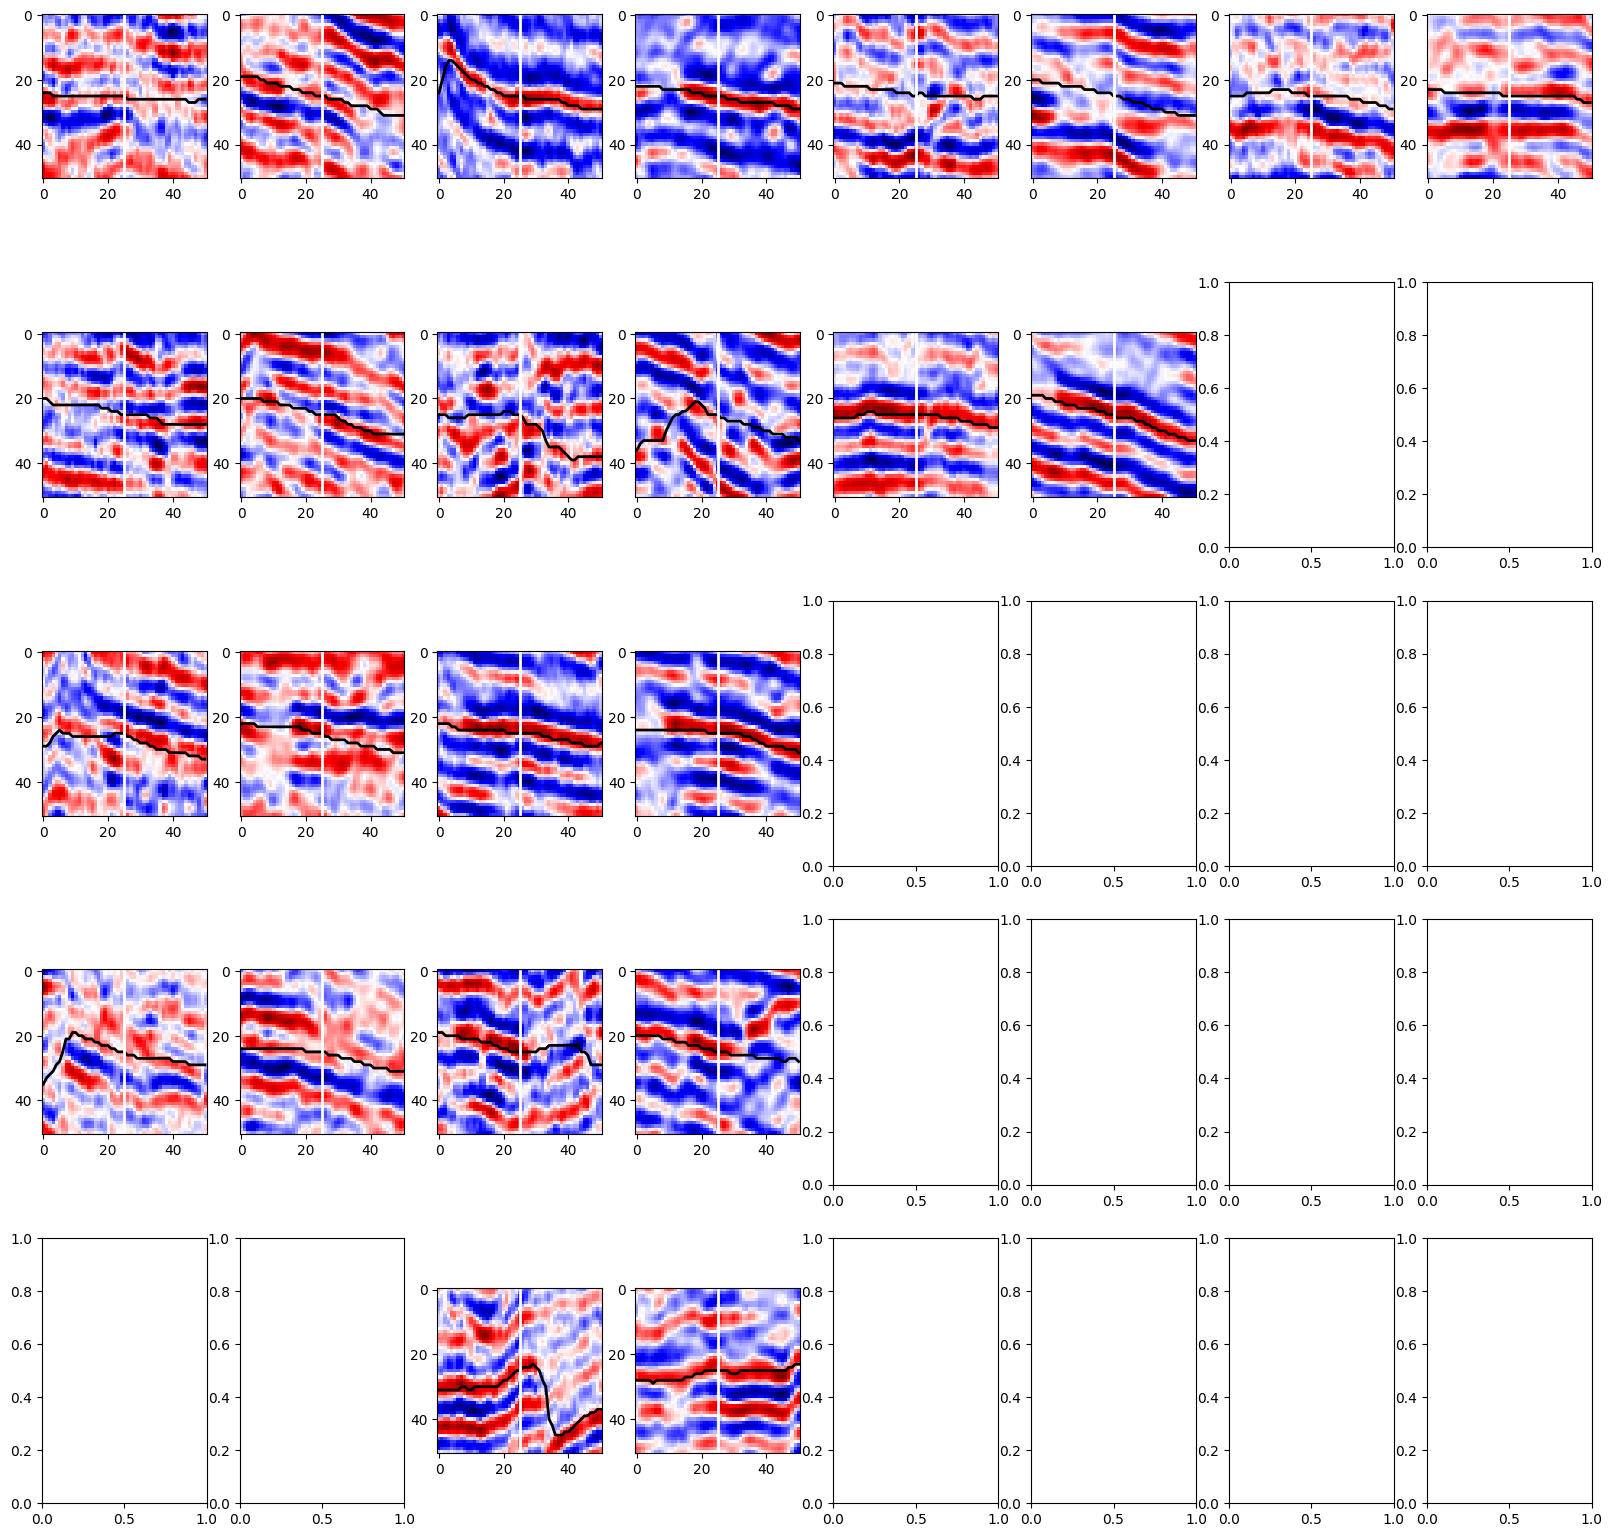

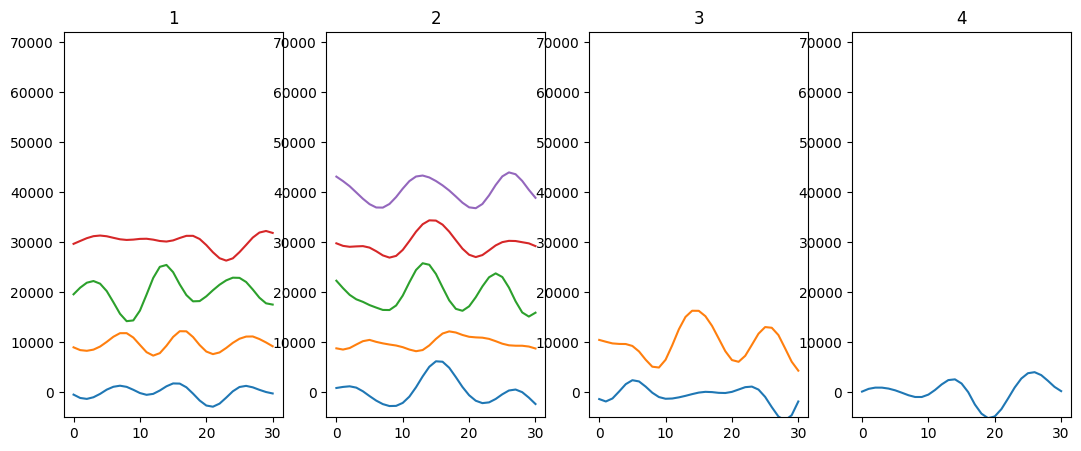

In [ ]:
wp1 = get_label(labels,hor)
dat1,dlabel1,dpos1 = get_label_data(wp1,label_dict)
pic1,pich1,dlabel1,dpos1 = get_pic_data(wp1,label_dict,hor)
plot_slice(dlabel1,label_dict,pic1,pich1,window=25,ep=25)
plot_wave(label_dict,dat1,dlabel1)